<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía

Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones bivariadas entre las variables a considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [ ]:
# Utilice este espacio para escribir el código.
#En One Drive
url = "https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Semana%201/Taller/data/lugares.csv"

data=pd.read_csv(url, sep=',')

#En carpeta
#data=pd.read_csv('data/lugares.csv', sep=',')

data.head()

,Ciudad,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### 2.  Análisis descriptivo de las variables.

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables.

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.

Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [ ]:
# Utilice este espacio para escribir el código.
data.describe()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,538.732523,8346.559271,1185.738602,961.054711,4210.082067,2814.887538,3150.884498,1845.957447,5525.364742
std,120.808259,2385.262622,1003.002036,357.154186,1451.179240,320.792953,4642.283738,807.888171,1084.468523
min,105.000000,5159.000000,43.000000,308.000000,1145.000000,1701.000000,52.000000,300.000000,3045.000000
25%,480.000000,6760.000000,583.000000,707.000000,3141.000000,2619.000000,778.000000,1316.000000,4842.000000
50%,542.000000,7877.000000,833.000000,947.000000,4080.000000,2794.000000,1871.000000,1670.000000,5384.000000
75%,592.000000,9015.000000,1445.000000,1156.000000,5205.000000,3012.000000,3844.000000,2176.000000,6113.000000
max,910.000000,23640.000000,7850.000000,2498.000000,8625.000000,3781.000000,56745.000000,4800.000000,9980.000000


In [ ]:
# Calcular el Coeficiente de Variación

data_subset = data.iloc[:, 1:]
cv = data_subset.std() / data_subset.mean()

# Mostrar el resultado
print(cv)


Clima y Terreno                            0.224245
Alojamiento                                0.285778
Cuidado de la salud y el medio ambiente    0.845888
Crimen                                     0.371627
Transporte                                 0.344691
Educación                                  0.113963
Artes                                      1.473327
Recreación                                 0.437653
Economía                                   0.196271
dtype: float64


Se puede observar que se tienen solo variables numericas y con algunas estadisticas descriptivas como se puede ver arriba, conteo de valores, la media, desviacion estandar, min, max y los cuartiles.


Ahora abajo vemos que no se tienen valores nulos en ninguna columna de los datos:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Ciudad                                   329 non-null    object
 1   Clima y Terreno                          329 non-null    int64 
 2   Alojamiento                              329 non-null    int64 
 3   Cuidado de la salud y el medio ambiente  329 non-null    int64 
 4   Crimen                                   329 non-null    int64 
 5   Transporte                               329 non-null    int64 
 6   Educación                                329 non-null    int64 
 7   Artes                                    329 non-null    int64 
 8   Recreación                               329 non-null    int64 
 9   Economía                                 329 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.8+ KB


A continuacion observaremos los histogramas de cada variable:

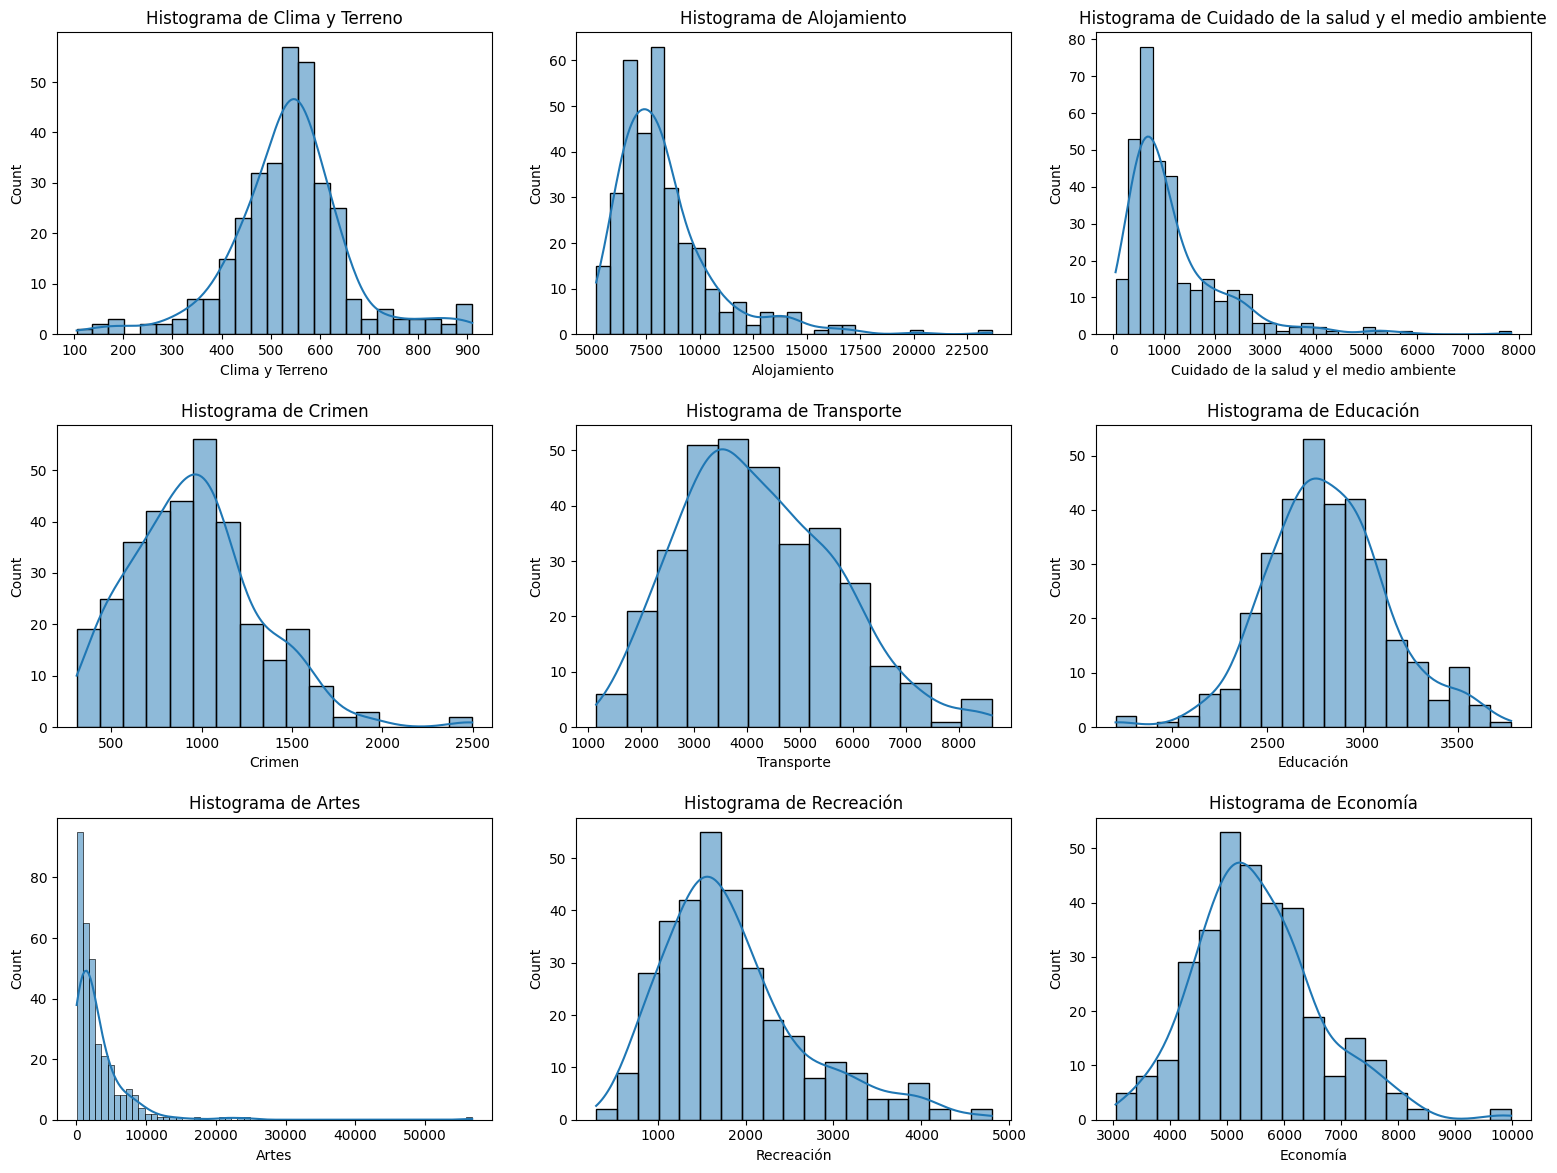

In [ ]:
def plot_histograms(dataframe):
    # Get the column names of the DataFrame
    columns = dataframe.columns
    # Set up the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols // 3) + (num_cols % 3 > 0)
    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, 3, figsize=(16, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3)  # Adjust vertical space between subplots
    # Flatten the 2D array of axes to simplify indexing
    axes = axes.flatten()
    # Loop through each column and plot the histogram
    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(dataframe[column], ax=ax, kde = True)
        ax.set_title(f'Histograma de {column}')
    # Remove empty subplots if needed
    for i in range(num_cols, num_rows * 3):
        fig.delaxes(axes[i])
    plt.show()

plot_histograms(data_subset)

A continuacion complementamos en análisis de cada variable con un pairplot de seaborn que nos muestra también las relaciones entre par de variables:

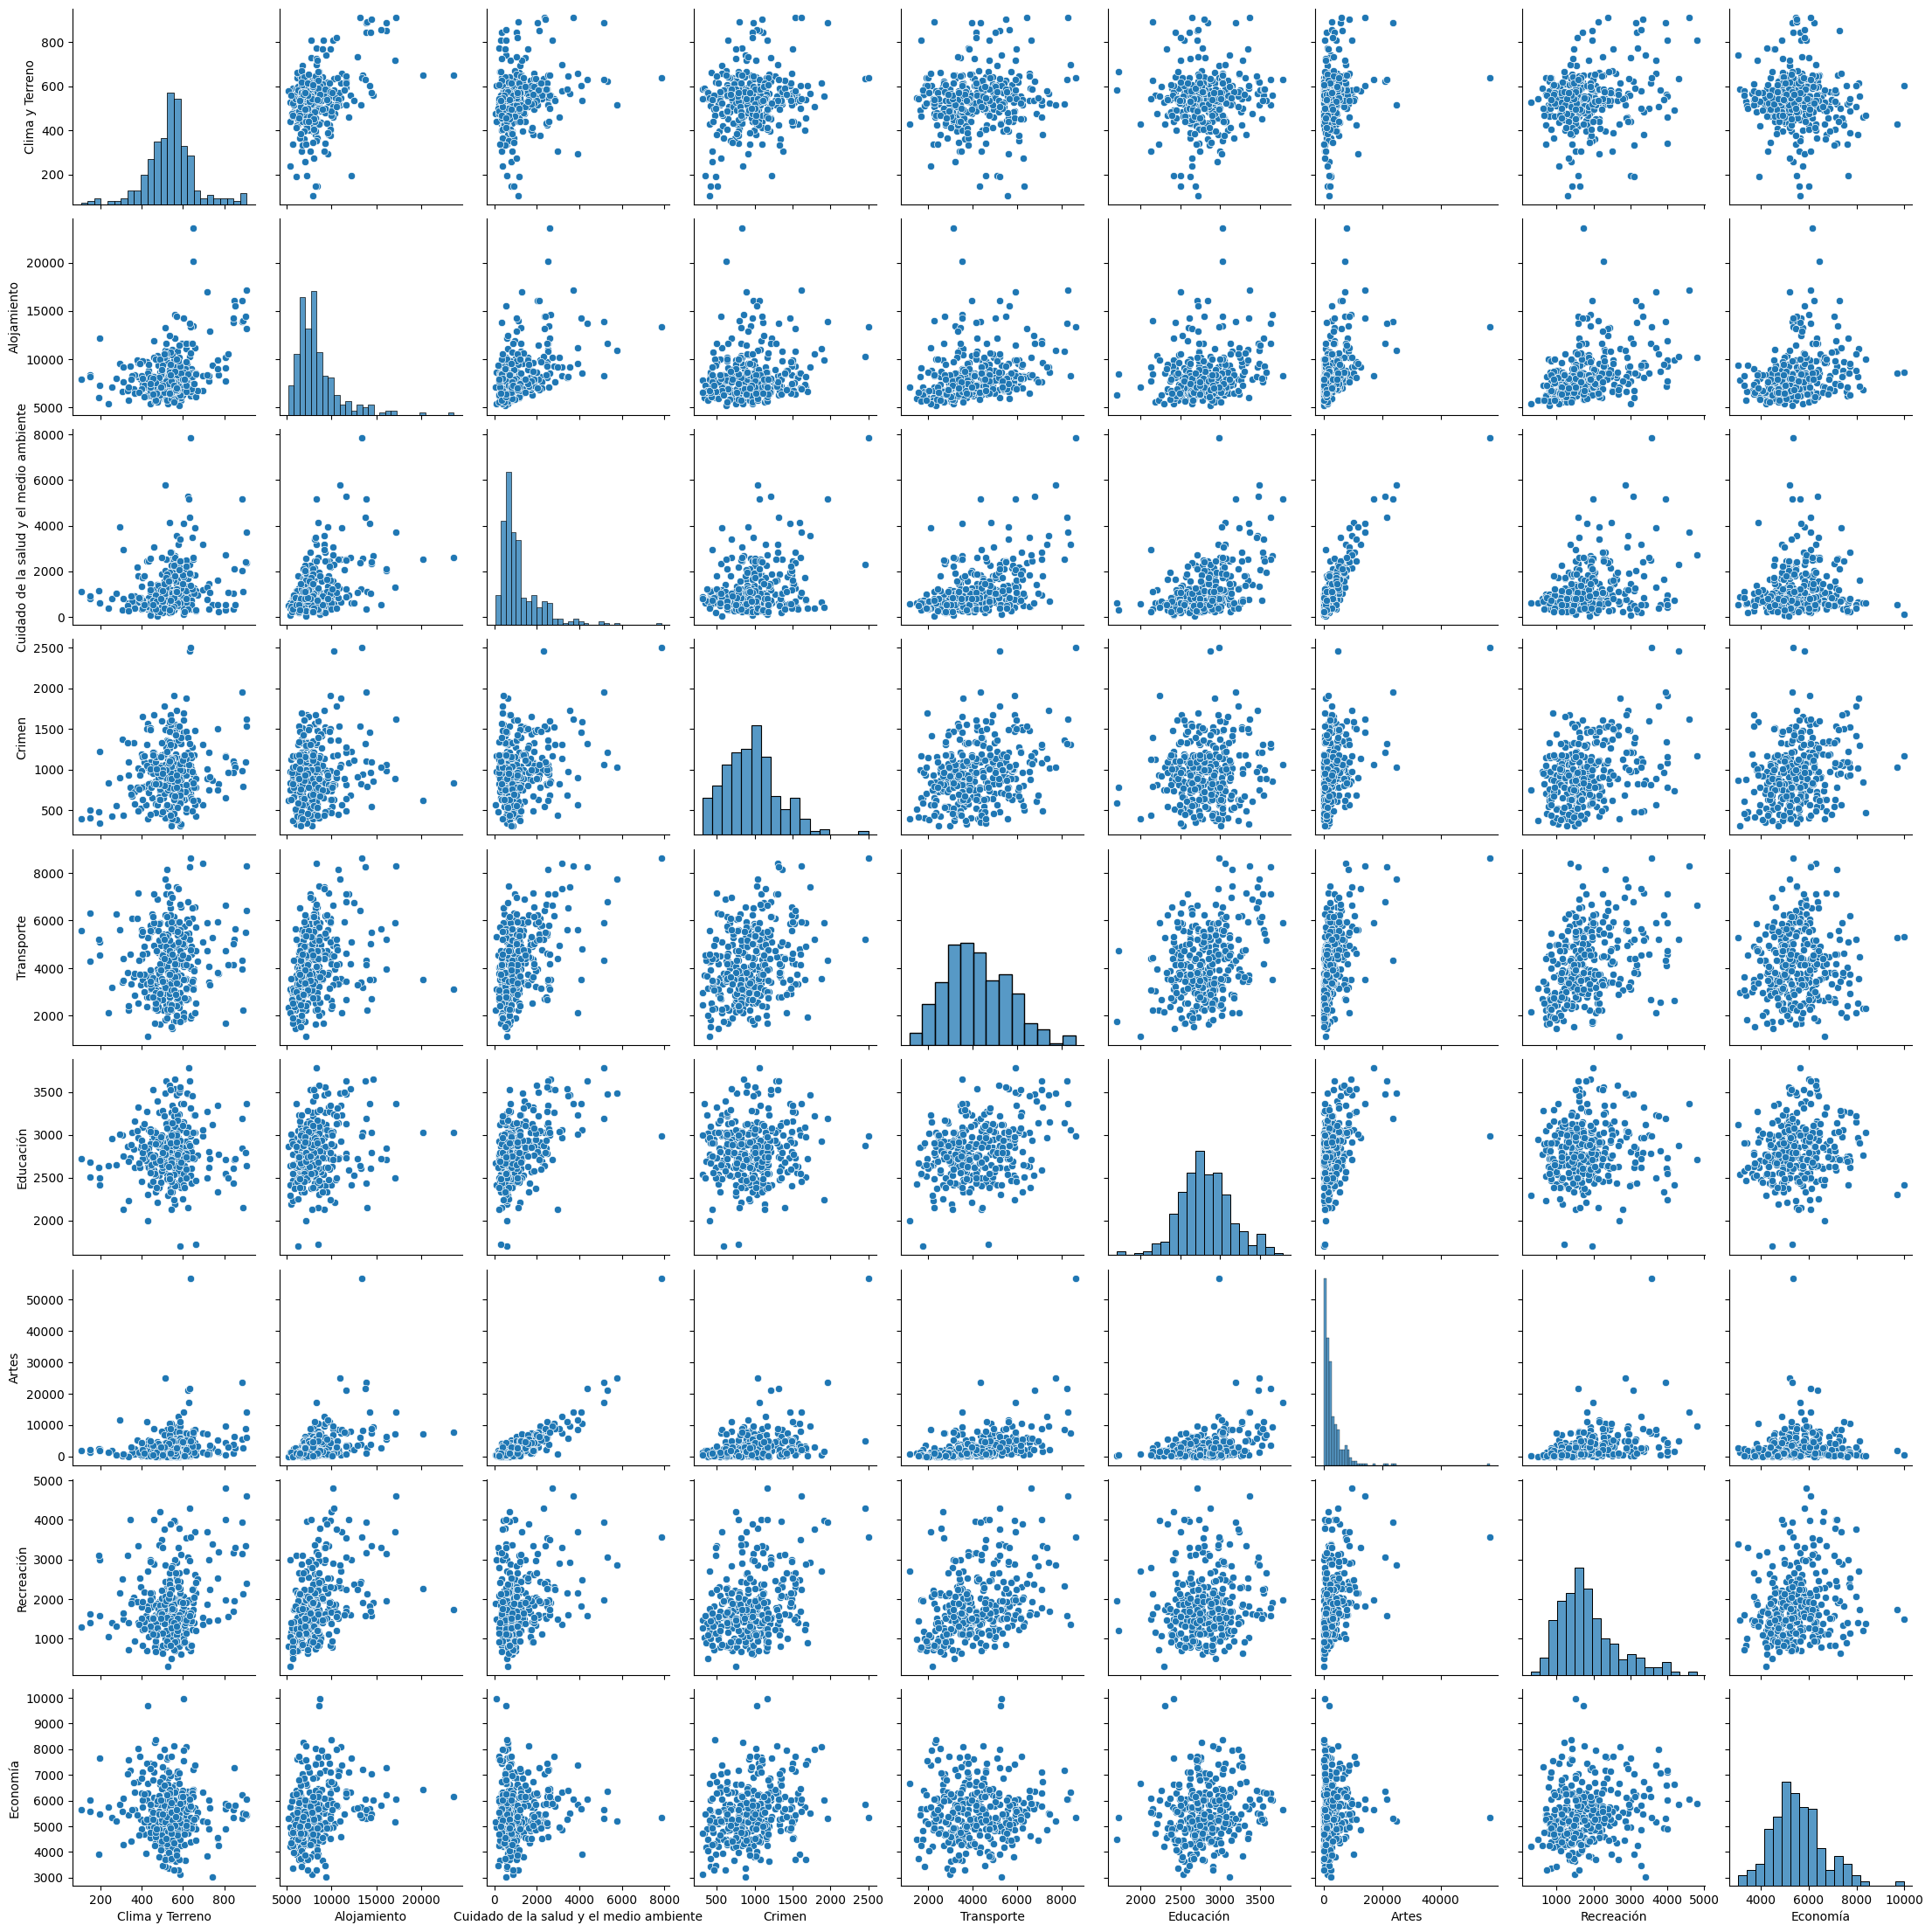

In [ ]:
sns.pairplot(data)

Vemos que algunas variablles tiene correlaciones faciles de ver inicialmente, mientras que otras no, asi como tambien que algunas se distribuyen normales y otras no.

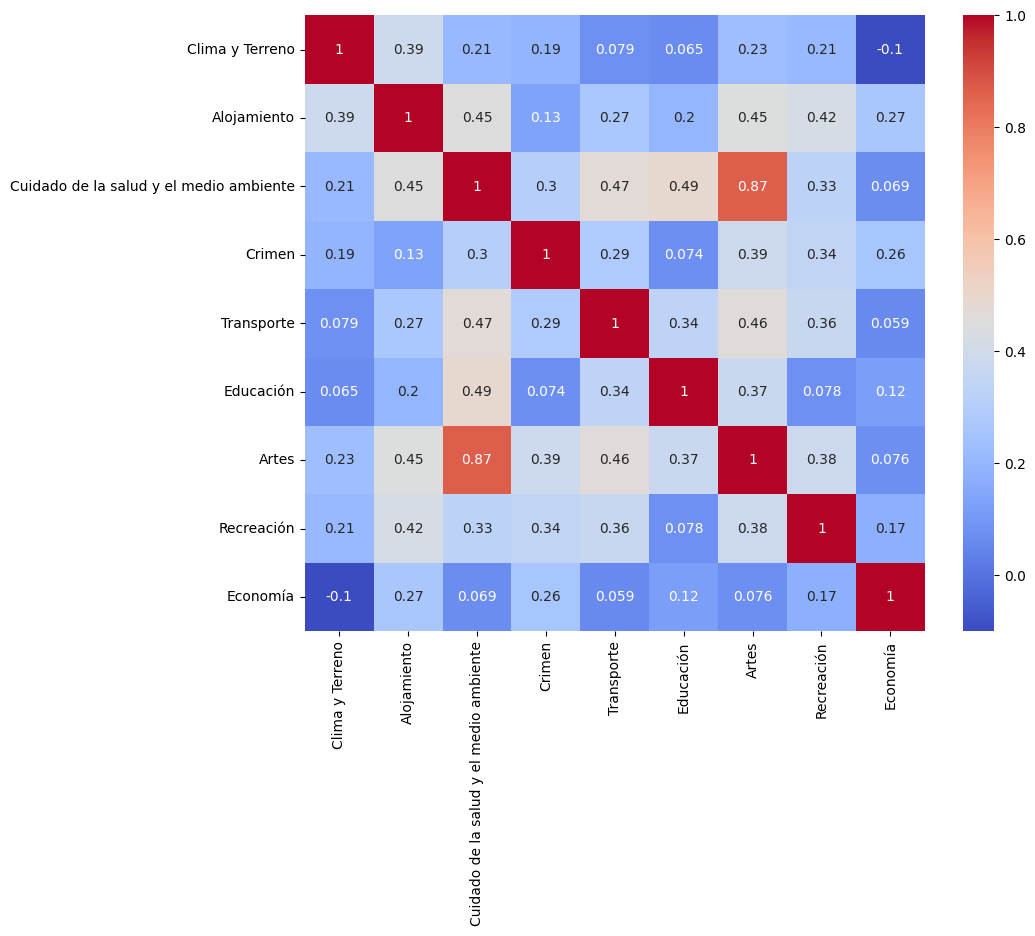

In [ ]:
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

#### Conclusiones punto 2:
Observando las medidas resumen cómo la media, el mínimo, máximo y desviación estándar podemos ver que más alla de tratarse de calificaciones las maginitudes son distintas según la variable, los mínimos, máximos y promedios varian mucho entre las variables. Por este motivo creemos pertinente escalar el dataframe antes de buscar los componentes principales con los métodos vistos en el curso.

Al calcular el coeficiente de variación para cada variable descubrimos que las variables donde se ve una mayor variación son "Artes" (1.47), "Cuidado de la salud y el medio ambiente" (0.84) y "Recreación" (0.44).

En los histogramas podemos ver cómo algunas variables concentran los datos en los valores bajos mostrando una cola hacia la derecha, lo que indica que hay algunos valores extremos altos. Esto indica que la mayoria de las ciudades tiene baja calificación y solo algunas poseen calificación alta que impactan positivamente la calidad de vida.

Estas variables son: "Alojamiento", "Cuidado de la salud y medio ambiente", y en mayor medida aún "Artes". Cabe aclarar que en el caso de "Alojamiento" esta información debe interpretarse de forma distinta porque en este caso a mayor calificación peor es la situación de la ciudad al respecto de esa variable. O sea que ese gráfico indica que la mayoria de las ciudades tienen valores bajos de calificacion respecto a "Alojamiento" lo que impacta positivamente la calidad de vida y hay menor cantidad de ciudades con valores altos de calificación, los cuales impactan negativamente la calidad de vida.

Las variables "Recreación" y "Crimen" muestran tambien una leve concentración hacia los valores bajos. Aqui la media es levemente mayor a la mediana, lo que implica que los datos se encuentra un poco más distribuidos entre valores bajos y altos pero hay más ciudades con valores bajos de calificación que ciudades con valores altos.

En este caso también "Crimen" debe interpretarse de forma distinta. Para esta variable a menor puntaje mejor. Podemos observar en el grafica un algunos posibles datos extremos hacia la derecha lo que implica que hay unas pocas ciudades donde en "Crimen" tiene un impacto negativo en la calidad de vida.  

Las variables "Clima y Terreno", "Recreación", "Transporte", "Educación" y "Economía" muestran una distribución bastante normal, lo que implica que no se ven datos tan extremos a un lado y otro de la media.

Luego de observar cada variable procedimos a explorar la relación entre variables a través de gráficos de dispersión bivariados y diagramas de correlación. Al tratarse de 9 variables para analizar la relación bivariada se requiere calcular las combinaciones de 9 en 2, lo que da cómo resultado 36 gráficos.

Al osbervar los gráficos bivariados de dispersión solo se observa algún tipo de correlación para las variables "Cuidado de la salud y el medio ambiente" y "Artes" que se confirma con el mapa de calor mostrando una correlación de 0.87.

Con esta situacion de los datos estaremos atentos a elegir componentes principales que reflejen loadings altos en las variables con alto grado de variabilidad ya que estas deberían ser las que tienen un mayor impacto en la calidad de vida.


### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso.

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

Primero se estandarizan los datos, ya que cuando usamos PCA buscamos maximizar varianza y la varianza se ve afectada por las unidades de medida. Esto implica que los componentes principales basados en la matriz de covarianza $S$ van a cambiar si las unidades de medida de una o más variables cambian. Para que esto no suceda, es práctica habitual  estandarizar las variables.


In [ ]:
X=data.set_index('Ciudad')

mu = X.mean()
sigma = X.std()
Z = (X - mu)/sigma
Z.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,-0.899926,-0.945899,-0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,-0.087437,0.468854,-0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,-0.422410,-0.566039,0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,-0.183862,0.244527,-0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,0.019470,0.665264,1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


In [ ]:
# Utilice este espacio para escribir el código.
S=Z.cov()
S

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,1.000000,0.386291,0.213303,0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
Alojamiento,0.386291,1.000000,0.453010,0.134222,0.271922,0.197934,0.448568,0.422288,0.269433
Cuidado de la salud y el medio ambiente,0.213303,0.453010,1.000000,0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crimen,0.192387,0.134222,0.304659,1.000000,0.286578,0.074416,0.389483,0.344627,0.259995
Transporte,0.079120,0.271922,0.470317,0.286578,1.000000,0.335992,0.464806,0.364716,0.059247
Educación,0.064520,0.197934,0.490234,0.074416,0.335992,1.000000,0.373279,0.077807,0.119700
Artes,0.226974,0.448568,0.865796,0.389483,0.464806,0.373279,1.000000,0.378659,0.075673
Recreación,0.213509,0.422288,0.325397,0.344627,0.364716,0.077807,0.378659,1.000000,0.173531
Economía,-0.100083,0.269433,0.069271,0.259995,0.059247,0.119700,0.075673,0.173531,1.000000


In [ ]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([3.4082918 , 1.21397617, 1.14147915, 0.92091782, 0.75328488,
       0.6305619 , 0.49304772, 0.31803849, 0.12040208])

In [ ]:
eig_vec=eig_vec.T
eig_vec[[0]].round(2)

array([[0.21, 0.36, 0.46, 0.28, 0.35, 0.28, 0.46, 0.33, 0.14]])

A continuacion se muestra como se convertirian todos los eigenvalores en componentes principales, sin embargo, vamos a hacer una selccion para saber cuantos queremos

In [ ]:
#Dataframe para almacenar los componentes principales
df_cp = pd.DataFrame()

#Calcular numero de componentes principales
num_components=eig_vec.shape[1]

for i in range(num_components):
    f = Z.dot(eig_vec[:, i])

    df_f = pd.DataFrame(f, columns=[f'CP{i + 1}'])

    df_cp = pd.concat([df_cp, df_f], axis=1)

print(df_cp.head())

                                 CP1       CP2       CP3       CP4       CP5  \
Ciudad                                                                         
Abilene,TX                 -1.014810 -0.329268 -1.348395  0.080161  0.000463   
Akron,OH                    1.001518 -0.475086  0.627440 -0.432557  1.243389   
Albany,GA                  -0.371341 -0.200623 -0.360555  0.998898 -0.632236   
Albany-Schenectady-Troy,NY -1.550329  0.257509  0.013180 -0.741672  0.169602   
Albuquerque,NM              0.393973  1.204560  0.596522 -1.948951  0.410995   

                                 CP6       CP7       CP8       CP9  
Ciudad                                                              
Abilene,TX                  1.208744  1.234090 -0.311443 -0.178503  
Akron,OH                   -0.085353 -0.935251  0.327524  0.061588  
Albany,GA                   1.291888 -0.888585 -0.712572 -0.302070  
Albany-Schenectady-Troy,NY -1.788926  0.711922  0.515597 -1.139487  
Albuquerque,NM           

Inicialmente se calculan los eigenvalores y se toma el vector que tiene el eigenvalor mas alto, los vectores asociados a este eigenvalor seran los loadings del primer componente principal, y asi sucesivamente. El array de arriba serian los componentes completos ya convertidos y fueron al final 9. Ahora faltara decidir cuantos se van a considerar realmente. Usando la proporcion de la varianza explicada.

In [ ]:
eig_val_sorted = np.sort(eig_val)[::-1]

# Calcular la varianza explicada por cada componente
var_eigenvalores = eig_val_sorted / np.sum(eig_val_sorted)

# Calcular la varianza explicada acumulada
var_eigenvalores_acumulada = np.cumsum(var_eigenvalores)

sorted_indices = np.argsort(eig_val)[::-1]
sorted_eig_val = eig_val[sorted_indices]
sorted_eig_vec = eig_vec[:, sorted_indices]


In [ ]:
for i in range(num_components):
    print(f'La varianza acumulada explicada por la componente {i + 1} es: {var_eigenvalores_acumulada[i]}')

La varianza acumulada explicada por la componente 1 es: 0.3786990889594714
La varianza acumulada explicada por la componente 2 es: 0.5135853296602306
La varianza acumulada explicada por la componente 3 es: 0.6404163460165321
La varianza acumulada explicada por la componente 4 es: 0.7427405486402828
La varianza acumulada explicada por la componente 5 es: 0.8264388684379311
La varianza acumulada explicada por la componente 6 es: 0.89650130144397
La varianza acumulada explicada por la componente 7 es: 0.9512843814605949
La varianza acumulada explicada por la componente 8 es: 0.9866219911547255
La varianza acumulada explicada por la componente 9 es: 0.9999999999999999


Como se puede ver con los primeros 4 componentes se explica el 74% de la varianza, por lo que en ese caso se tomarian los primeros 4 componentes, usando la proporcion de la varianza explicada como factor de seleccion:

Otro criterio es el de Kaiser, el cual sugiere que solo se retengan los componentes principales cuyos eigenvalores sean mayores a 1, como los datos estan estandarizados como se ve a continuacion:


Usando este criterio solor se tendrian en cuenta 3 componentes. Sin embargo con esta cantidad de componentes explica menos del 70% de la varianza y el 4 componente tiene un eigenvalor de 0.92 que es bastante cercano al 1, por lo tanto se usaran realmente 4 PCA para tener un modelo que mantenga un buen nivel de varianza y reduzca dimensionalidad

In [ ]:
num_components_kaiser = np.sum(sorted_eig_val > 1)
print(f'Número de componentes principales según el criterio de Kaiser: {num_components_kaiser}')


Número de componentes principales según el criterio de Kaiser: 3


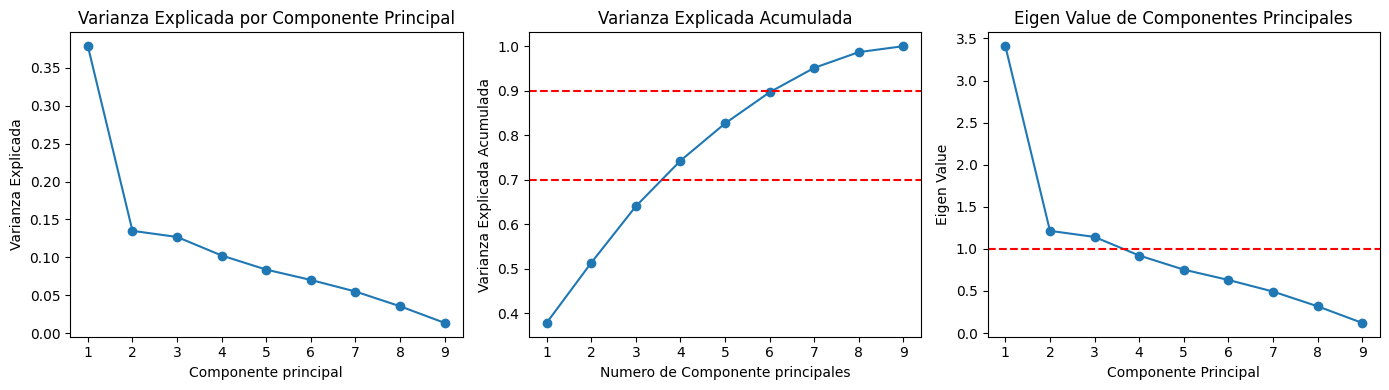

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Explained variance plot
ax[0].plot(range(1, len(var_eigenvalores) + 1), var_eigenvalores, marker='o')
ax[0].set_xlabel('Componente principal')
ax[0].set_ylabel('Varianza Explicada')
ax[0].set_title('Varianza Explicada por Componente Principal')


# Cumulative explained variance plot
ax[1].plot(range(1, len(var_eigenvalores.cumsum()) + 1), var_eigenvalores.cumsum(), marker='o')
ax[1].set_xlabel('Numero de Componente principales')
ax[1].set_ylabel('Varianza Explicada Acumulada')
ax[1].set_title('Varianza Explicada Acumulada')
ax[1].axhline(y = 0.9, color = 'r', linestyle = '--')
ax[1].axhline(y = 0.7, color = 'r', linestyle = '--')

ax[2].plot(range(1, len(eig_val) + 1), eig_val, marker='o')
ax[2].set_xlabel('Componente Principal')
ax[2].set_ylabel('Eigen Value')
ax[2].set_title('Eigen Value de Componentes Principales')
ax[2].axhline(y = 1.0, color = 'r', linestyle = '--')

plt.tight_layout()
plt.show()

In [ ]:

#Seleccionar los primeros n componentes de eigenvalores y sus correspondientes eigenvectores
num_top_components = 4
top_eig_val = sorted_eig_val[:num_top_components]
top_eig_vec = sorted_eig_vec[:, :num_top_components]

df_cp = pd.DataFrame()

for i in range(num_top_components):
    f = Z.dot(top_eig_vec[:, i])  # Calcular el componente principal

    df_f = pd.DataFrame(f, columns=[f'CP{i + 1}'])  # Crear DataFrame para este componente

    df_cp = pd.concat([df_cp, df_f], axis=1)  # Concatenar al DataFrame principal

print(df_cp.head())

                                 CP1       CP2       CP3       CP4
Ciudad                                                            
Abilene,TX                 -1.014810 -0.329268 -1.348395  0.080161
Akron,OH                    1.001518 -0.475086  0.627440 -0.432557
Albany,GA                  -0.371341 -0.200623 -0.360555  0.998898
Albany-Schenectady-Troy,NY -1.550329  0.257509  0.013180 -0.741672
Albuquerque,NM              0.393973  1.204560  0.596522 -1.948951


#### Conclusion punto 3

Primero se estandarizaron los datos, ya que cuando usamos PCA buscamos maximizar varianza y la varianza se ve afectada por las unidades de medida. Esto implica que los componentes principales basados en la matriz de covarianza  S  van a cambiar si las unidades de medida de una o más variables cambian. Para que esto no suceda, es práctica habitual estandarizar las variables.

Una vez estandarizados los datos restando la media y dividiendo sobre la desviacion estandar calculamos la matriz de varianzas y covarianzas. A partir de esta matriz se puede calcular los eigenvalores y eigenvectores. En aprendizaje automático, los eigenvectores y eigenvalores se utilizan en técnicas como el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos.

En el contexto de estadística y análisis de datos, los eigenvalores de la matriz de covarianza están relacionados directamente con la varianza de los datos en las direcciones correspondientes a sus eigenvectores.

Gracias a estos se puede saber que componentes tendrian una mayor varianza, y los eigenvectores serian los loadings necesarios para construrir cada componente.

Una vez se tiene la opcion de crear las componentes principales, es posible elegir cuantas componentes tomar. Para esto existen varias formas de seleccionar las componentes. En este caso se observo la varianza explicada y el criterio de Kaiser.


En los primeros 4 componentes se explica el 74% de la varianza, usando la proporcion de la varianza explicada como factor de seleccion.

En un análisis de componentes principales, los eigenvalores representan la cantidad de varianza que cada componente principal captura de los datos originales, un eigenvalor mayor que 1 indica que el componente principal está capturando más varianza que la aportada por una variable estándarizada original (que tiene una varianza de 1). Por lo tanto, en el cirterio de Kaiser retener componentes con eigenvalores superiores a 1 garantiza que estos componentes contribuyen significativamente a explicar la varianza total en el conjunto de datos. Mientras que en la proporcion de la varianza explicada se toma la suma de varianza


### 4.  Interpretación de los componentes principales.

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, pueden los pesos obtenidos identificar dimensiones menores de los datos? Provea una interpretación a estas dimensiones, para ello puede utilizar gráficas y/o tablas.

In [ ]:
# Utilice este espacio para escribir el código.

print(f'Tamaño del DataFrame original: {X.shape}')
print(f'Tamaño del DataFrame reducido: {df_cp.shape}')

Tamaño del DataFrame original: (329, 9)
Tamaño del DataFrame reducido: (329, 4)


Se puede ver que si se redujo la dimension del modelo trabajado, pasa de **9** componentes a solo **4**. Utilizaremos la libreria **pca** para interpretar mejor la relacion entre los componentes seleccionados y las variables originales.

En el siguiente pairplot tambien se evidencia el exito de PCA al lograr que los puntos proyectados tengan una mejor distribucion en el plano a como estaban originalmente, esto logrado ya que cada componente resultante es ortogonal entre si

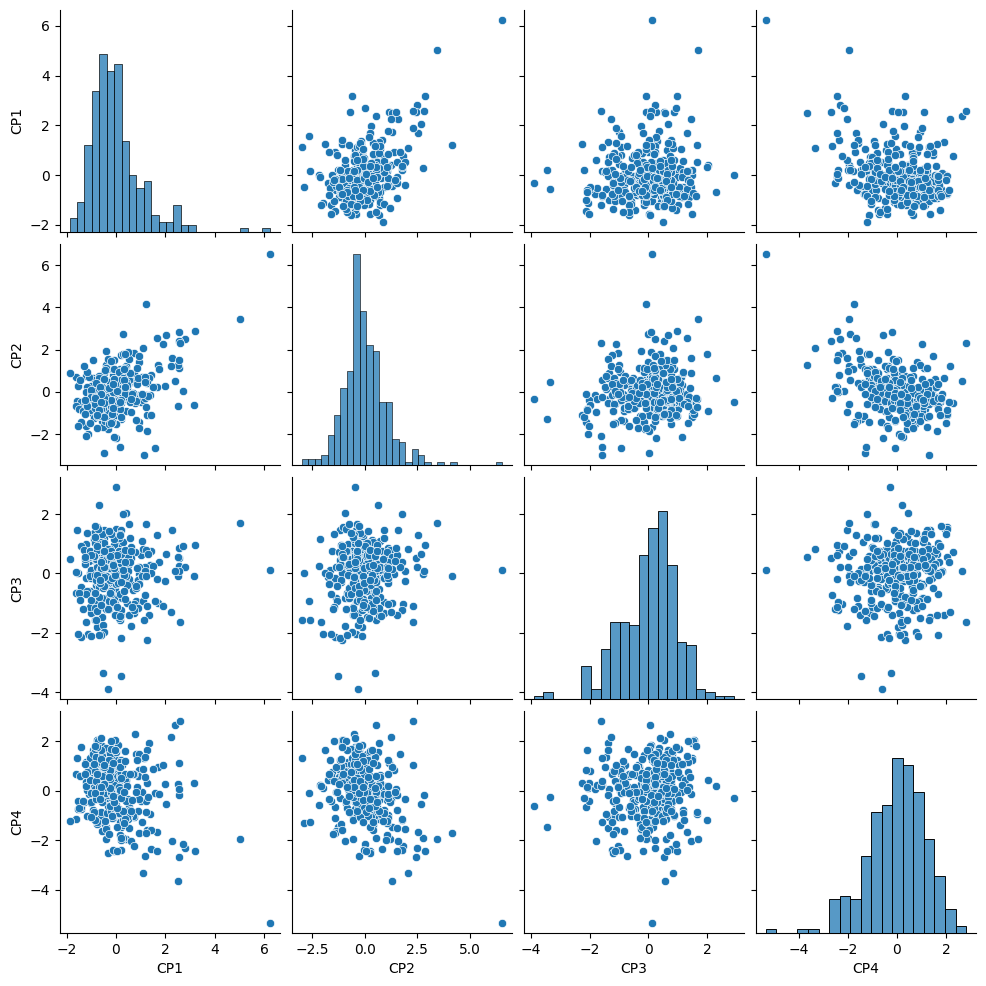

In [ ]:
sns.pairplot(df_cp)

In [ ]:
#pip install pca

In [ ]:
from pca import pca
import itertools

model = pca(n_components=4)
ciudades_pca = model.fit_transform(Z, verbose=0)

A contnuacion se evaluan las relaciones e interpretaciones que se pueden obtener a partir de los distintos componentes seleciconados

#### Componentes PC1 - PC2

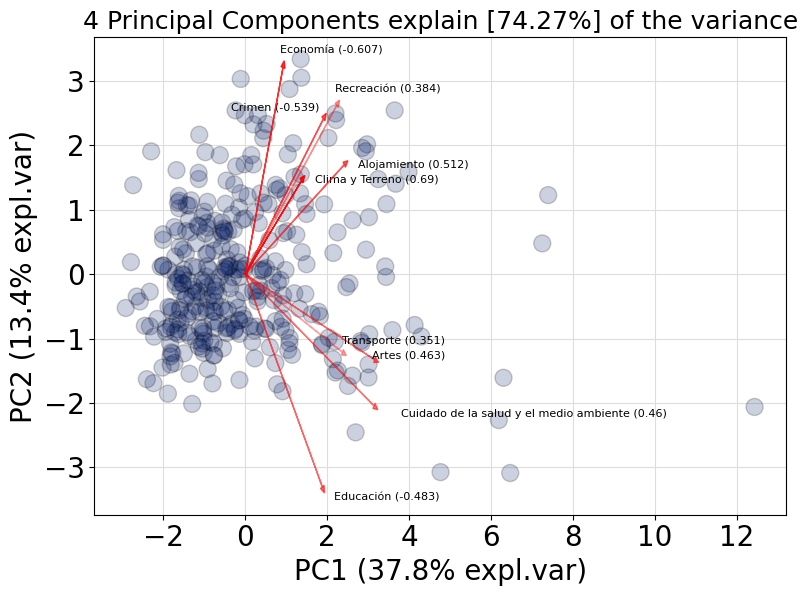

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
model.biplot(PC=[0, 1], alpha=0.2,legend=False, color_arrow="red", arrowdict={'color_text':"black"}, ax=ax, verbose = 0, fontsize=8)

plt.tight_layout()
plt.show()

En la grafica que relaciona los componentes 1 y 2 se pueden dividir los datos en 2 cuadrantes a partir del eje **Y** ya que se evidencia una division entre las direcciones de los vectores, ademas que el angulo formado entre estos es pequeño indicando una relacion cercana entre estos.

##### Cuadrante 1 (+Y)
En éste cuadrante se ubican ciudades con puntajaes altos en:

- Economia
- Recreacion
- Crimen
- Alojamiento

por lo tanto tendremos ciudades en donde estos elementos fueron importantes a la hora de calificarlos, para poder determinar si son buenas ciudades hay que evaluar, si el *Crimen* y *Alojamiento* tienen un valor alto

##### Cuadrante 2 (-Y)
En éste cuadrante se ubican ciudades con puntajaes altos en:

- Educacion
- Cuidado de la salud y el medio ambiente
- Artes
- Transporte

por lo tanto tendremos ciudades donde estos elementos son altamente valorados, al no haber cognotaciones negativas en estos conceptos podría argumentarse que las ciudades que esten mas alejados en este cuadrante serán candidatos a ser mejores ciudades.

#### Componentes PC1-PC3

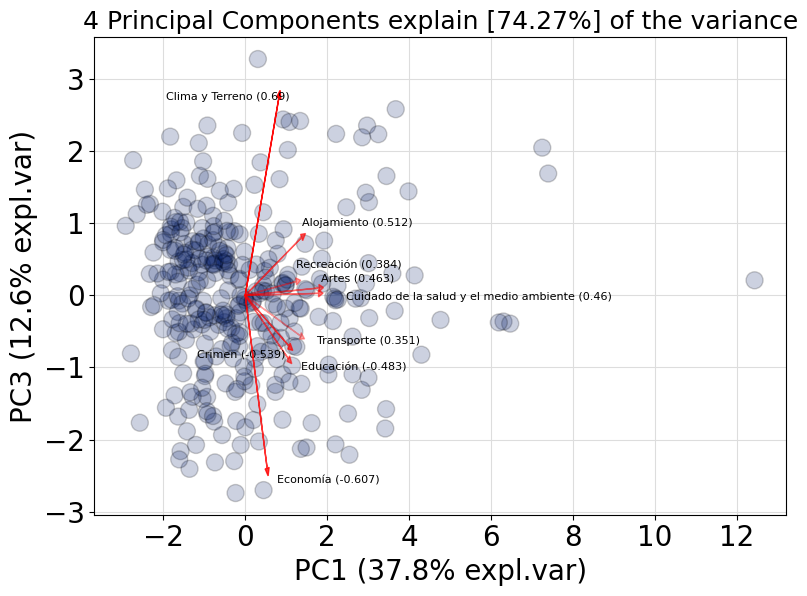

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
model.biplot(PC=[0, 2], alpha=0.2,legend=False, color_arrow="red", arrowdict={'color_text':"black"}, ax=ax, verbose = 0, fontsize=8)

plt.tight_layout()
plt.show()

En la grafica que relaciona los componentes 1 y 3 La diferencia principal en la relacion de estos componentes se da entre las valoraciones que se dan entre las variables

- Clima y terreno
- Economia

##### Cuadrante 1 (+Y)
En éste cuadrante se ubican ciudades donde la valoracion del *Clima y terreno* es alta por lo tanto seran ciudades con un buen concepto de esta variable


##### Cuadrante 2 (-Y)
En éste cuadrante se ubican ciudades donde la valoracion de *Economia* es alta puede argumentarse que las ciudades mas alejadas en este sentido del eje son propesperas económicamente

#### Componentes PC1 - PC4

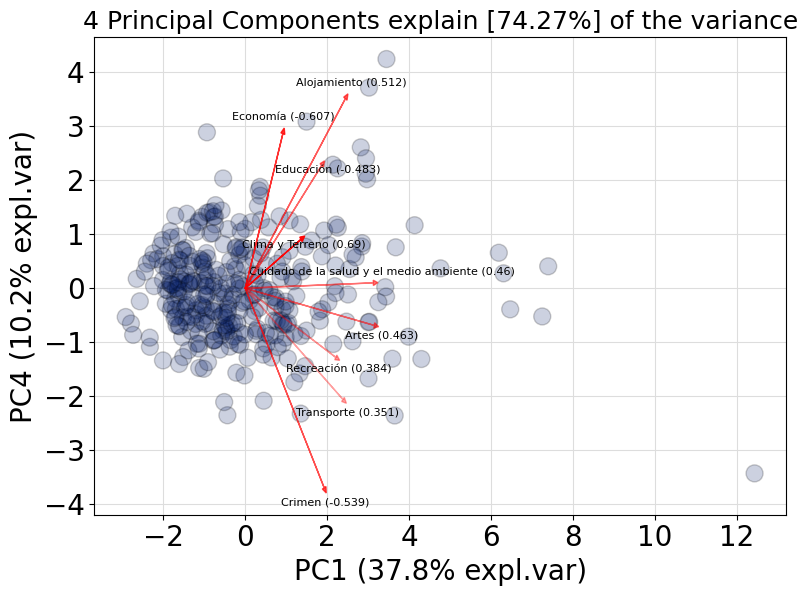

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
model.biplot(PC=[0, 3], alpha=0.2,legend=False, color_arrow="red", arrowdict={'color_text':"black"}, ax=ax, verbose = 0, fontsize=8)

plt.tight_layout()
plt.show()

En la grafica que relaciona los componentes 1 y 4 nuevamente nos permite ver una diferenciacion en el eje **Y**

##### Cuadrante 1 (+Y)
En este cuadrante la influencia principal esta dada por
- Alojamiento
- Economia
- Educacion

siendo la variable de *Alojamiento* la de mas alta magnitud es la que mas influencia tendrá, adicionalmente esta variable tiene una cognotacion negativa por lo que los puntos que esten mas alejados en esta direccion pueden tener una alta calificacion en éste concepto

##### Cuadrante 2 (-Y)
En este cuadrante la influencia principal esta dada por
- Crimen
- Transporte
- Recreacion

La variable mas influyente en éste cuadrante es Crimen, por lo tanto los puntos(ciudades) que esten mas alejados en este sentido pueden tener una alta calificacion en criminalidad

#### Componentes PC2 - PC3

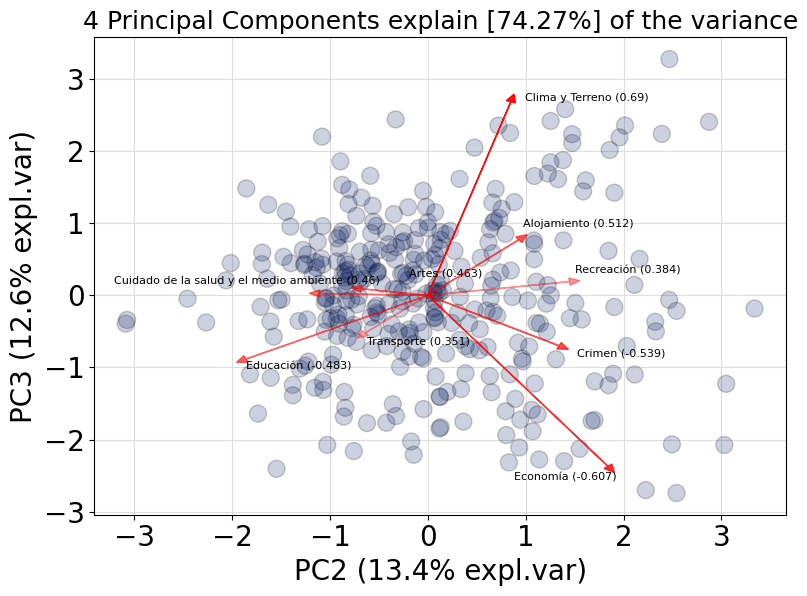

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
model.biplot(PC=[1, 2], alpha=0.2,legend=False, color_arrow="red", arrowdict={'color_text':"black"}, ax=ax, verbose = 0, fontsize=8)

plt.tight_layout()
plt.show()

Para esta combinacion de componentes vemos asociaciones que ya habiamos visto antes sin embargo tambien permite identificar cuadrantes y preferencias adicionales.

##### Cuadrante 1 (X+,Y+)
En este cuadrante se ubican ciudades con una mejor percepcion de clima y terreno, con buena recreacion pero con problemas en la percepcion del alojamiento

##### Cuadrante 2 (X-,Y+)
en este cuadrante se encontraran ciudades con buena percepcion de climea y terreno, adicionalmente con buena educacion, mejor cuidado de salud y el medio ambiente y las artes

##### Cuadrante 3 (X-,Y-)
en este cuadrante se encontraran ciudades con buena percepcion económica, adicionalmente con buena educacion y mejor transporte que las ciudades en otros cuadrantes

##### Cuadrante 4 (X+,Y-)
en este cuadrante se encontraran ciudades con buena percepcion económica, con mejor recreacion sin embargo tambien tienen un alto puntaje en criminalidad

#### Componentes PC2 - PC4

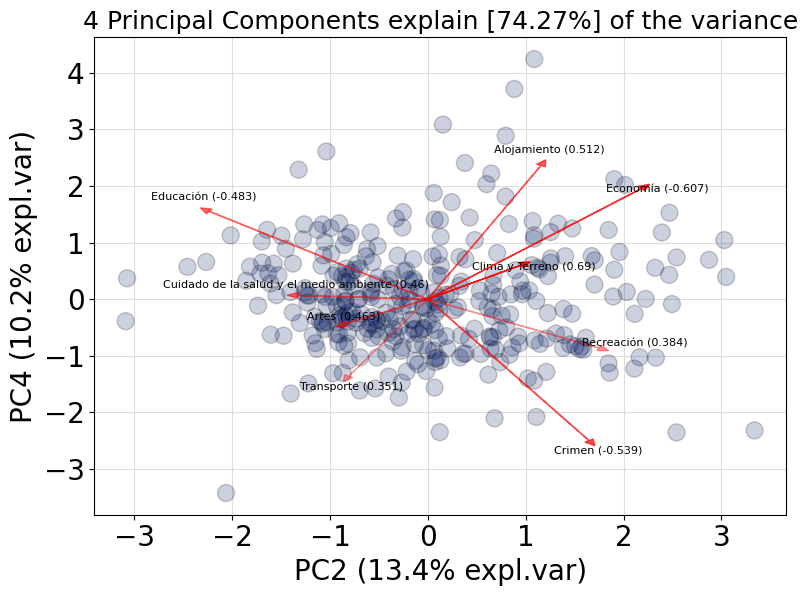

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
model.biplot(PC=[1, 3], alpha=0.2,legend=False, color_arrow="red", arrowdict={'color_text':"black"}, ax=ax, verbose = 0, fontsize=8)

plt.tight_layout()
plt.show()

Si bien a partir de este grafico tambien se puede dividir en cuadrantes para describir las ciudades, llama más la atención que el vector de educación tiene como opuestos al vector de crimen y recreación, dandonos a entender que una mejor educación podria ayudar a reducir los indices de criminalidad. Tambien a partir de los angulos entre vectores se ve que las ciudades mas educadas tienen preferencias por las artes y por el cuidado de la salud y el medio ambiente.

#### Componentes PC3 - PC4

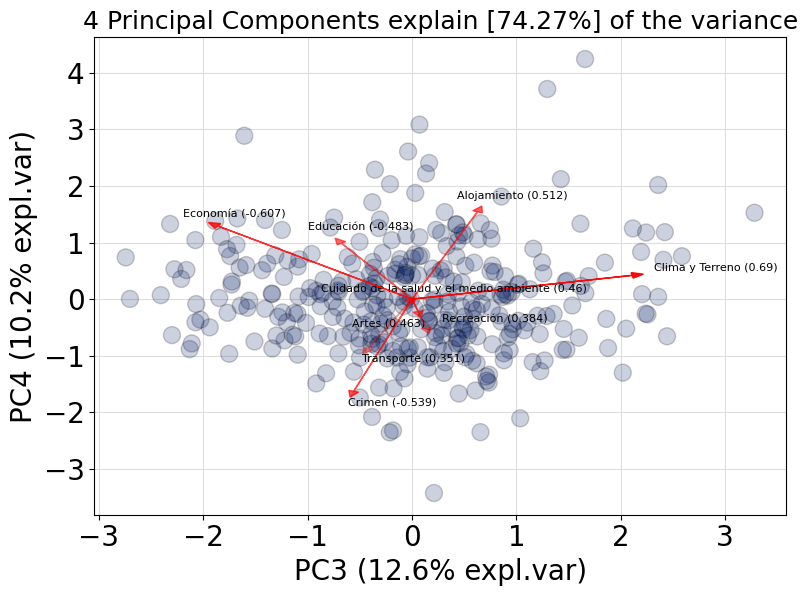

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
model.biplot(PC=[2, 3], alpha=0.2,legend=False, color_arrow="red", arrowdict={'color_text':"black"}, ax=ax, verbose = 0, fontsize=8)

plt.tight_layout()
plt.show()

Esta relacion entre los cuadrantes nos permite interpretar nuevamente prefernecias de ciudades segun 4 cuadrantes en donde las variables mas influyentes son
- Clima y Terreno
- Economia
- Crimen
- Alojamiento

##### Cuadrante 1 (X+,Y+)
En este cuadrante se ubican ciudades con una mejor percepcion de clima y terreno pero con problemas en la percepcion del alojamiento

##### Cuadrante 2 (X-,Y+)
en este cuadrante se encontraran ciudades con buena percepcion económica pero con problemas en la percepcion del alojamiento

##### Cuadrante 3 (X-,Y-)
en este cuadrante se encontraran ciudades con buena percepcion económica pero con problemas de crimen

##### Cuadrante 4 (X+,Y-)
en este cuadrante se encontraran ciudades con buena percepcion de climea y terreno pero con problemas de crimen

#### Conclusion Punto 4

Principalmente si se logra reducir las dimensiones del analisis de **9** dimensiones a **4**.

El metodo de PCA no solo ayuda a reducir las dimensiones si no que a partir de los nuevos componentes y su relacion, a través de los loadings, con las variables orginales se pueden encontrar relaciones que no eran evidentes en los datos originales. A partir de este analisis se pueden encontrar cuadrantes, zonas de interés o outliers según el analisis de los componentes, ejercicio que fue explicado en detalle en las celdas anteriores.

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [ ]:
# Deteccion de Outliers usando PCA
model2 = pca(n_components=2)
Z_pca2 = model2.fit_transform(Z, verbose = False)

# Sort cities by the first principal component
best_cities = Z_pca2['PC'].sort_values(by='PC1', ascending=False)
best_cities.head(7)

,PC1,PC2
"New-York,NY",12.426251,-2.061746
"San-Francisco,CA",7.391403,1.227000
"Los-Angeles,Long-Beach,CA",7.246307,0.477152
"Chicago,IL",6.464912,-3.087134
"Boston,MA",6.301057,-1.608742
"Washington,DC-MD-VA",6.186471,-2.264874
"Philadelphia,PA-NJ",4.765370,-3.073287


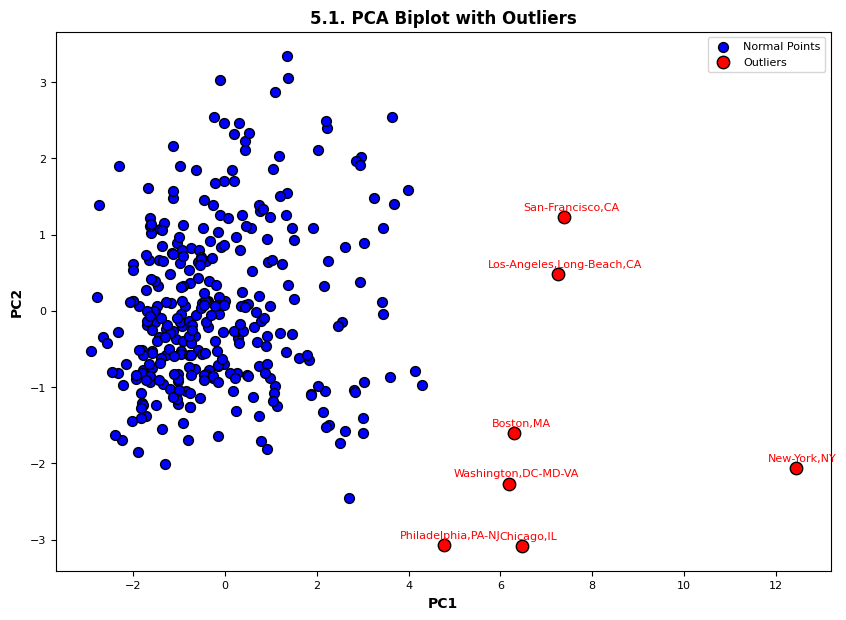

In [ ]:
# Extract principal components from the result
PC = Z_pca2['PC']
# Extract the outliers boolean array
outliers_bool = Z_pca2['outliers']['y_bool']
# Extract PC1 and PC2 for plotting
pc1 = PC['PC1']
pc2 = PC['PC2']
# Create the biplot
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(pc1, pc2, color='blue', edgecolor='k', s=50, label='Normal Points')
# Highlight outliers
ax.scatter(pc1[outliers_bool], pc2[outliers_bool], color='red', edgecolor='k', s=80, label='Outliers')
# Annotate outliers with their indices (city names in this case)
for index, (x, y, is_outlier) in enumerate(zip(pc1, pc2, outliers_bool)):
    if is_outlier:
        ax.annotate(PC.index[index], (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8, color='red')
# Add labels and legend
ax.set_xlabel('PC1', fontsize=10,fontweight='bold')
ax.set_ylabel('PC2', fontsize=10,fontweight='bold')
ax.set_title('5.1. PCA Biplot with Outliers', fontsize=12,fontweight='bold')
plt.legend()
plt.show()

Umbral Superior: 5.530044327110147
Umbral Inferior: -5.530044327110147


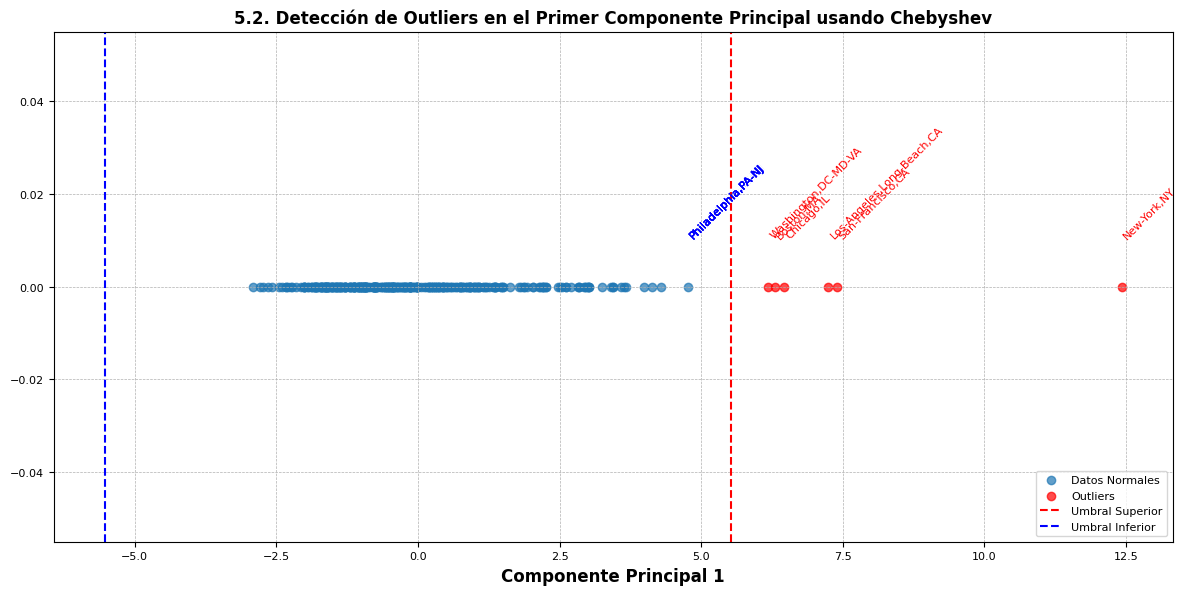

In [ ]:
# Mean and standard deviation of PC1
mean_pc1 = np.mean(pc1)
std_pc1 = np.std(pc1)

# Chebyshev thresholds
k = 3  # Tolerance level
outlier_threshold_high = mean_pc1 + k * std_pc1
outlier_threshold_low = mean_pc1 - k * std_pc1

# Identify outliers using the thresholds
outliers = (pc1 > outlier_threshold_high) | (pc1 < outlier_threshold_low)

# Show thresholds
print(f"Umbral Superior: {outlier_threshold_high}")
print(f"Umbral Inferior: {outlier_threshold_low}")

# Separate outliers and normal data
outliers_data = PC[outliers]  # Outliers data
normal_data = PC[~outliers]   # Normal data

# Plotting
plt.figure(figsize=(12, 6))

# Plot normal data
plt.scatter(normal_data['PC1'], np.zeros_like(normal_data['PC1']), label='Datos Normales', alpha=0.7)

# Plot outliers
plt.scatter(outliers_data['PC1'], np.zeros_like(outliers_data['PC1']), color='red', label='Outliers', alpha=0.7)

# Annotate outliers with their names
for index, row in outliers_data.iterrows():
    plt.text(row['PC1'], 0.01, index, color='red', fontsize=8, ha='left', va='bottom', rotation=45)

    # Find the closest point to each outlier from the normal data
    closest_index = (normal_data['PC1'] - row['PC1']).abs().idxmin()
    closest_value = normal_data.loc[closest_index, 'PC1']

    # Annotate the closest point to the left of the outlier
    plt.text(closest_value, 0.01, closest_index, color='blue', fontsize=8, ha='left', va='bottom', rotation=45)

# Plot threshold lines
plt.axvline(x=outlier_threshold_high, color='r', linestyle='--', label='Umbral Superior')
plt.axvline(x=outlier_threshold_low, color='b', linestyle='--', label='Umbral Inferior')

# Labels and title
plt.xlabel('Componente Principal 1', fontsize=12, fontweight='bold')
plt.title('5.2. Detección de Outliers en el Primer Componente Principal usando Chebyshev',fontsize=12,fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

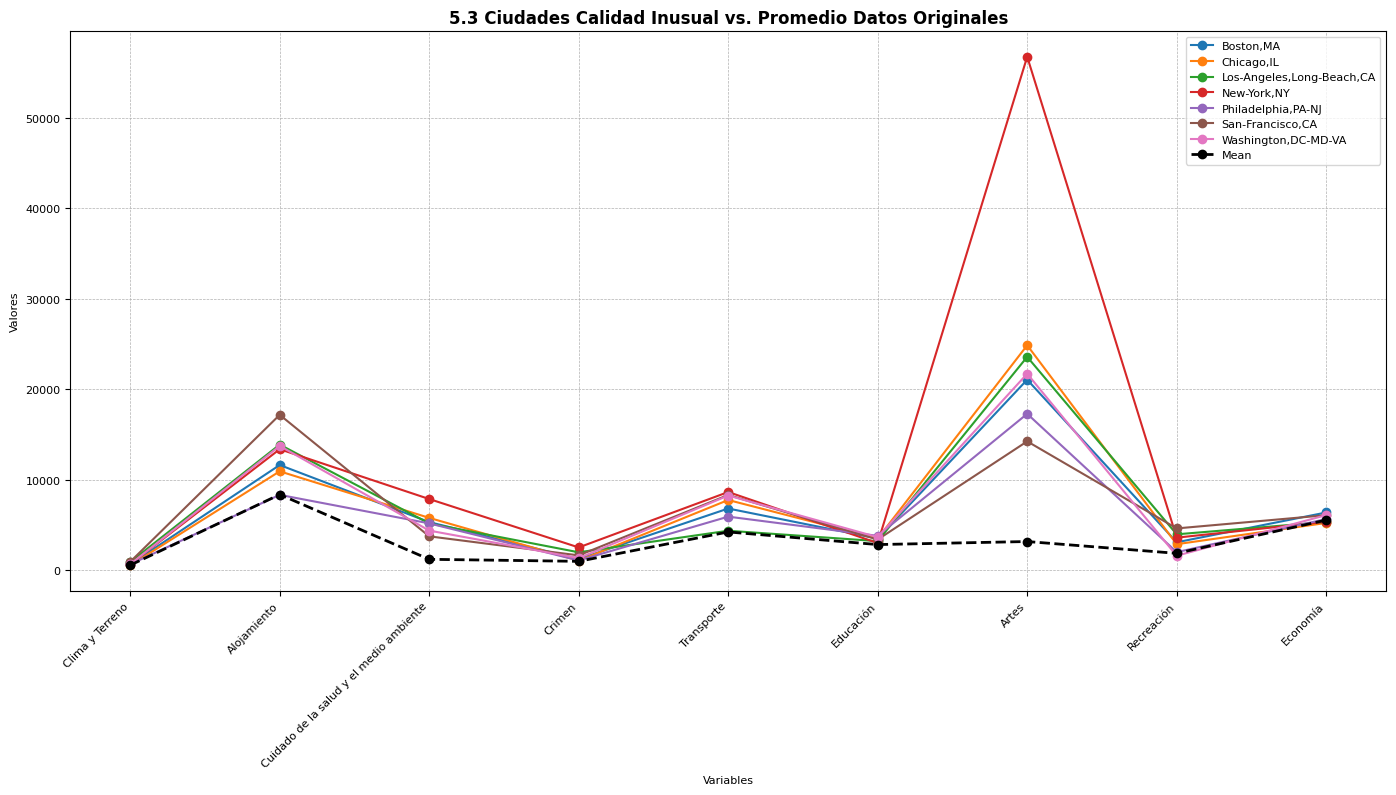

In [ ]:
# Filtrar datos originals para incluir solo las cidades detectadas como outliers
outliers_data = X[outliers_bool]
# Calcular promedio de cada variable original
data_mean = X.mean()
# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
for index, row in outliers_data.iterrows():
    ax.plot(row.index, row.values, marker='o', linestyle='-', label=index)
ax.plot(data_mean.index, data_mean.values, marker='o', linestyle='--', color='black', linewidth=2, label='Mean')
ax.set_title('5.3 Ciudades Calidad Inusual vs. Promedio Datos Originales', fontsize=12,fontweight='bold')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')
ax.set_xticks(data_mean.index)
ax.set_xticklabels(data_mean.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

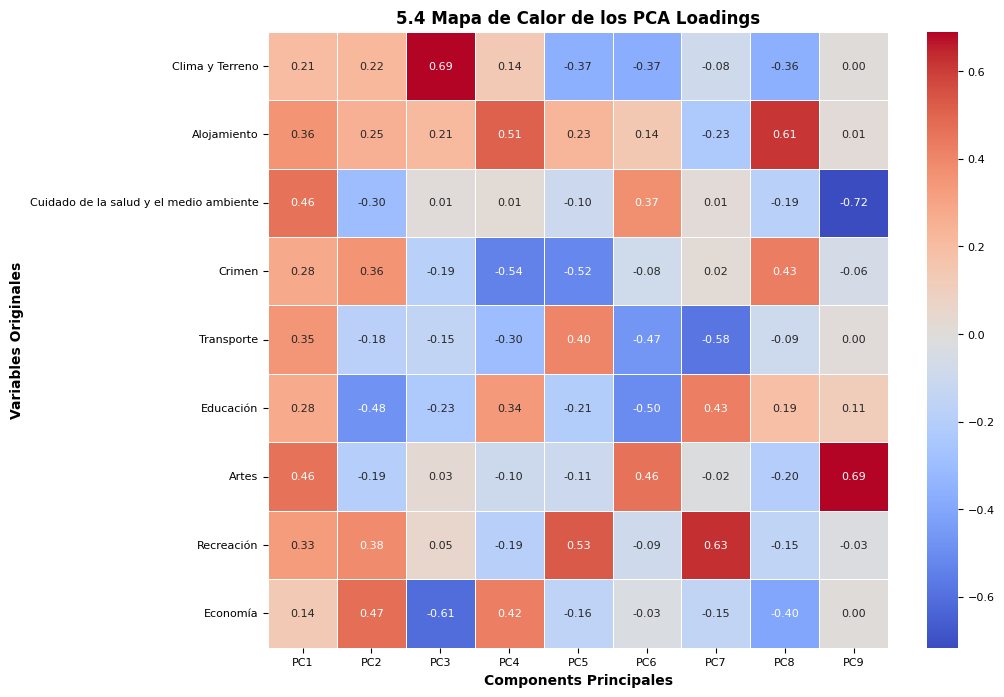

In [ ]:
# Un ultimo analisis
# Inicializamos el objeto PCA
modelT = pca(n_components=9)
# Ajustamos el PCA a nuestros datos
Z_pcaT = modelT.fit_transform(Z, verbose=False)
Z_pcaT_loadings= Z_pcaT['loadings'].T
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Z_pcaT_loadings, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=.5)
plt.title('5.4 Mapa de Calor de los PCA Loadings', fontsize=12,fontweight='bold')
plt.xlabel('Components Principales', fontsize=10,fontweight='bold')
plt.ylabel('Variables Originales', fontsize=10,fontweight='bold')
plt.show()

**Conclusiones Punto 5**

Para identificar las ciudades con mayor calidad de vida, se utilizaron los dos primeros componentes para  correr el modelo pca de la libreria con el mismo nombre en pypi. Sin embargo,  el enfoque sólo es en el primero. Al listar las ciudades de manera descendente con ese criterio se obtiene el siguiente resultado:

| Ciudad                      | Valor |
|-----------------------------|-------|
| New-York, NY                | 12.43 |
| San-Francisco, CA           | 7.39  |
| Los-Angeles, Long-Beach, CA | 7.25  |
| Chicago, IL                 | 6.46  |
| Boston, MA                  | 6.30  |
| Washington, DC-MD-VA        | 6.19  |
| Philadelphia, PA-NJ         | 4.76  |

Esto coincide con las observaciones anormales que se identifican utilizando la salida del modelo pca para identificar outliers (['outliers']['y_bool']),  que aparecen en rojo en la Gráfica 5.1. Al utilizar  dos componentes se facilita la identificación de las tales observaciones anormales.


Para verificar este hallazgo se utilizó el criterio de umbrales de Chebyshev sobre el primer componente. A excepcion de Filadelfia se encuentran las mismas ciudades identificadas anteriormente (Grafica 5.2)

Sobre las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual, dado que solo estamos considerando el primer componente, las variables que tienen mayor influencia por sus pesos en el componente son en orden descendiente:

| Category                                 | Value  |
|------------------------------------------|--------|
| Artes                                    | 0.463  |
| Cuidado de la salud y el medio ambiente  | 0.460  |
| Alojamiento                              | 0.356  |
| Transporte                               | 0.351  |
| Recreación                               | 0.327  |
| Crimen                                   | 0.281  |
| Educación                                | 0.275  |
| Clima y Terreno                          | 0.206  |
| Economía                                 | 0.135  |

Los valores originales de los datos al ser multiplicados por tales pesos, determinan la contribución final al componente principal.

Para evaluar que tan inusuales son las ciudades identificadas con respecto a la muestra, se grafican (5.3) los valores originales de las variables en estas observaciones y la media de las mismas, es claro como algunos de estos valores se alejan de la media (Alojamiento y Cuidado de la Salud y Medio Ambiente), y en una medida mucho mayor en el area de las Artes.

Esto tiene mucho sentido. En la medida que los ciudadanos satisfacen sus necesidades basicas: alimentacion, vivienda, salud, podran invertir en su capital cultural a traves de las artes. A nivel macro de ciudad, se puede proponer algo similar, una vez satisfechas las necesidades de infraestructura (incluidas salud, transporte, seguridad y educacion), entonces las mismas pueden ofrecer alternativas de enriquecimiento cultural a sus ciudadanos. No es conincidencia que sean las ciudades identificadas las que albergan los museos mas importantes de Estados Unidos, el MoMA, el MET, el Guggenheim en Nueva York, el Getty en Los Angeles, el Instituto de Arte y el Field Museum en Chicago, el Smithsonian y la Galeria Nacional de Arte en Washington DC, El Museo de Arte Moderno en San Francisco  o las orquestas filarmonicas en  Boston, Chicago, Filadelfia y New York, Broadway, etc. Esto en 1985, pues la escena artistica con seguridad ha evolucionado con nuevas y renovadas atracciones artisticas en estas y otras ciudades.


Finalmente, en la Gráfica 5.4. se muestra como solo en el primer componente se encuentran todos los pesos positivos, lo que nos permitió proponer que el mismo es un buen indicador de la calidad de vida de las ciudades. Como se observó en el punto 4, la interpretabilidad del modelo se hace mas complicada a medida que inclumos mas componentes, en este ultimo punto el objetivo era identificar las ciudades con calidad de vida inusual, y el primer componente fue efectivo para tal propósito.
